# Exploratory Analysis

In [1]:
#import the required libraries

import sklearn
import time
import pandas as pd
import fastf1 as ff1
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

## Extracting the Data from fastf1 (https://docs.fastf1.dev/index.html)

In [2]:
# Adjusts the log level to only display errors and critical messages
logging.getLogger('fastf1').setLevel(logging.ERROR)

# Call sessions
bahrain_2024 = ff1.get_session(2024, 'Bahrain', 'R')

# Load sessions
bahrain_2024.load()

In [3]:
# Call laps
bahrain_2024_laps = bahrain_2024.laps

# Add column called 'Event_Year'
bahrain_2024_laps['Event_Year'] = 'bahrain_2024'

# Add column called 'LapTime_seconds'
bahrain_2024_laps['LapTime_seconds'] = bahrain_2024_laps['LapTime'].dt.total_seconds()

# Add column called 'Delta_Lap'
bahrain_2024_laps['Delta_Lap'] = 0.0

# Calcular o delta_lap para cada piloto
for driver in bahrain_2024_laps['Driver'].unique():
    # Filtrar os dados do piloto atual
    driver_data = bahrain_2024_laps[bahrain_2024_laps['Driver'] == driver]

    # Calcular a diferença entre voltas consecutivas
    delta_lap = driver_data['LapTime_seconds'].diff().fillna(0)

    # Atribuir os valores calculados à coluna 'delta_lap'
    bahrain_2024_laps.loc[driver_data.index, 'Delta_Lap'] = delta_lap

bahrain_2024_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,Event_Year,LapTime_seconds,Delta_Lap
0,0 days 01:01:37.489000,VER,1,0 days 00:01:37.284000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:41.266000,...,2024-03-02 15:03:42.342,12,1.0,False,,False,False,bahrain_2024,97.284,0.000
1,0 days 01:03:13.785000,VER,1,0 days 00:01:36.296000,2.0,1.0,NaT,NaT,0 days 00:00:30.916000,0 days 00:00:41.661000,...,2024-03-02 15:05:19.920,1,1.0,False,,False,True,bahrain_2024,96.296,-0.988
2,0 days 01:04:50.538000,VER,1,0 days 00:01:36.753000,3.0,1.0,NaT,NaT,0 days 00:00:30.999000,0 days 00:00:41.966000,...,2024-03-02 15:06:56.216,1,1.0,False,,False,True,bahrain_2024,96.753,0.457
3,0 days 01:06:27.185000,VER,1,0 days 00:01:36.647000,4.0,1.0,NaT,NaT,0 days 00:00:30.931000,0 days 00:00:41.892000,...,2024-03-02 15:08:32.969,1,1.0,False,,False,True,bahrain_2024,96.647,-0.106
4,0 days 01:08:04.358000,VER,1,0 days 00:01:37.173000,5.0,1.0,NaT,NaT,0 days 00:00:31.255000,0 days 00:00:42.056000,...,2024-03-02 15:10:09.616,1,1.0,False,,False,True,bahrain_2024,97.173,0.526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,0 days 02:25:37.835000,SAR,2,0 days 00:01:35.972000,51.0,4.0,NaT,NaT,0 days 00:00:30.781000,0 days 00:00:41.539000,...,2024-03-02 16:27:44.294,1,20.0,False,,False,True,bahrain_2024,95.972,0.312
1125,0 days 02:27:13.822000,SAR,2,0 days 00:01:35.987000,52.0,4.0,NaT,NaT,0 days 00:00:30.775000,0 days 00:00:41.440000,...,2024-03-02 16:29:20.266,1,20.0,False,,False,True,bahrain_2024,95.987,0.015
1126,0 days 02:28:49.910000,SAR,2,0 days 00:01:36.088000,53.0,4.0,NaT,NaT,0 days 00:00:30.798000,0 days 00:00:41.610000,...,2024-03-02 16:30:56.253,1,20.0,False,,False,True,bahrain_2024,96.088,0.101
1127,0 days 02:30:29.524000,SAR,2,0 days 00:01:39.614000,54.0,4.0,NaT,NaT,0 days 00:00:32.179000,0 days 00:00:43.748000,...,2024-03-02 16:32:32.341,1,20.0,False,,False,True,bahrain_2024,99.614,3.526


In [4]:
pd.set_option('display.max_columns', None)

bahrain_2024_laps.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,Event_Year,LapTime_seconds,Delta_Lap
0,0 days 01:01:37.489000,VER,1,0 days 00:01:37.284000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:41.266000,0 days 00:00:23.616000,NaT,0 days 01:01:13.987000,0 days 01:01:37.669000,234.0,250.0,276.0,251.0,False,SOFT,4.0,False,Red Bull Racing,0 days 00:59:59.911000,2024-03-02 15:03:42.342,12,1.0,False,,False,False,bahrain_2024,97.284,0.000
1,0 days 01:03:13.785000,VER,1,0 days 00:01:36.296000,2.0,1.0,NaT,NaT,0 days 00:00:30.916000,0 days 00:00:41.661000,0 days 00:00:23.719000,0 days 01:02:08.426000,0 days 01:02:50.087000,0 days 01:03:13.806000,232.0,248.0,276.0,287.0,True,SOFT,5.0,False,Red Bull Racing,0 days 01:01:37.489000,2024-03-02 15:05:19.920,1,1.0,False,,False,True,bahrain_2024,96.296,-0.988
2,0 days 01:04:50.538000,VER,1,0 days 00:01:36.753000,3.0,1.0,NaT,NaT,0 days 00:00:30.999000,0 days 00:00:41.966000,0 days 00:00:23.788000,0 days 01:03:44.805000,0 days 01:04:26.771000,0 days 01:04:50.559000,231.0,243.0,276.0,290.0,False,SOFT,6.0,False,Red Bull Racing,0 days 01:03:13.785000,2024-03-02 15:06:56.216,1,1.0,False,,False,True,bahrain_2024,96.753,0.457
3,0 days 01:06:27.185000,VER,1,0 days 00:01:36.647000,4.0,1.0,NaT,NaT,0 days 00:00:30.931000,0 days 00:00:41.892000,0 days 00:00:23.824000,0 days 01:05:21.490000,0 days 01:06:03.382000,0 days 01:06:27.206000,233.0,253.0,276.0,NaN,False,SOFT,7.0,False,Red Bull Racing,0 days 01:04:50.538000,2024-03-02 15:08:32.969,1,1.0,False,,False,True,bahrain_2024,96.647,-0.106
4,0 days 01:08:04.358000,VER,1,0 days 00:01:37.173000,5.0,1.0,NaT,NaT,0 days 00:00:31.255000,0 days 00:00:42.056000,0 days 00:00:23.862000,0 days 01:06:58.461000,0 days 01:07:40.517000,0 days 01:08:04.379000,231.0,245.0,276.0,289.0,False,SOFT,8.0,False,Red Bull Racing,0 days 01:06:27.185000,2024-03-02 15:10:09.616,1,1.0,False,,False,True,bahrain_2024,97.173,0.526


In [5]:
# Call weather data
bahrain_2024_laps_weather = bahrain_2024_laps.get_weather_data()
bahrain_2024_laps_weather.head()

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
60,0 days 01:00:14.115000,18.2,49.0,1017.2,False,23.8,58,1.5
62,0 days 01:02:14.121000,18.3,49.0,1017.0,False,23.8,33,1.1
63,0 days 01:03:14.127000,18.3,49.0,1017.1,False,23.8,89,1.5
65,0 days 01:05:14.127000,18.3,49.0,1017.0,False,23.7,24,0.9
67,0 days 01:07:14.127000,18.3,50.0,1017.1,False,23.5,40,1.5


In [6]:
# Reset the indexes to ensure correct alignment
bahrain_2024_laps_ = bahrain_2024_laps.reset_index(drop=True)
bahrain_2024_weather_ = bahrain_2024_laps_weather.reset_index(drop=True)

# Exclude the 'Time' column from the weather DataFrame to avoid redundancy
bahrain_2024_weather_ = bahrain_2024_weather_.drop(columns=['Time'])

# Joining DataFrames
bahrain_2024_joined = pd.concat([bahrain_2024_laps_, bahrain_2024_weather_], axis=1)

bahrain_2024_joined

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,Event_Year,LapTime_seconds,Delta_Lap,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 01:01:37.489000,VER,1,0 days 00:01:37.284000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:41.266000,0 days 00:00:23.616000,NaT,0 days 01:01:13.987000,0 days 01:01:37.669000,234.0,250.0,276.0,251.0,False,SOFT,4.0,False,Red Bull Racing,0 days 00:59:59.911000,2024-03-02 15:03:42.342,12,1.0,False,,False,False,bahrain_2024,97.284,0.000,18.2,49.0,1017.2,False,23.8,58,1.5
1,0 days 01:03:13.785000,VER,1,0 days 00:01:36.296000,2.0,1.0,NaT,NaT,0 days 00:00:30.916000,0 days 00:00:41.661000,0 days 00:00:23.719000,0 days 01:02:08.426000,0 days 01:02:50.087000,0 days 01:03:13.806000,232.0,248.0,276.0,287.0,True,SOFT,5.0,False,Red Bull Racing,0 days 01:01:37.489000,2024-03-02 15:05:19.920,1,1.0,False,,False,True,bahrain_2024,96.296,-0.988,18.3,49.0,1017.0,False,23.8,33,1.1
2,0 days 01:04:50.538000,VER,1,0 days 00:01:36.753000,3.0,1.0,NaT,NaT,0 days 00:00:30.999000,0 days 00:00:41.966000,0 days 00:00:23.788000,0 days 01:03:44.805000,0 days 01:04:26.771000,0 days 01:04:50.559000,231.0,243.0,276.0,290.0,False,SOFT,6.0,False,Red Bull Racing,0 days 01:03:13.785000,2024-03-02 15:06:56.216,1,1.0,False,,False,True,bahrain_2024,96.753,0.457,18.3,49.0,1017.1,False,23.8,89,1.5
3,0 days 01:06:27.185000,VER,1,0 days 00:01:36.647000,4.0,1.0,NaT,NaT,0 days 00:00:30.931000,0 days 00:00:41.892000,0 days 00:00:23.824000,0 days 01:05:21.490000,0 days 01:06:03.382000,0 days 01:06:27.206000,233.0,253.0,276.0,NaN,False,SOFT,7.0,False,Red Bull Racing,0 days 01:04:50.538000,2024-03-02 15:08:32.969,1,1.0,False,,False,True,bahrain_2024,96.647,-0.106,18.3,49.0,1017.0,False,23.7,24,0.9
4,0 days 01:08:04.358000,VER,1,0 days 00:01:37.173000,5.0,1.0,NaT,NaT,0 days 00:00:31.255000,0 days 00:00:42.056000,0 days 00:00:23.862000,0 days 01:06:58.461000,0 days 01:07:40.517000,0 days 01:08:04.379000,231.0,245.0,276.0,289.0,False,SOFT,8.0,False,Red Bull Racing,0 days 01:06:27.185000,2024-03-02 15:10:09.616,1,1.0,False,,False,True,bahrain_2024,97.173,0.526,18.3,50.0,1017.1,False,23.5,40,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,0 days 02:25:37.835000,SAR,2,0 days 00:01:35.972000,51.0,4.0,NaT,NaT,0 days 00:00:30.781000,0 days 00:00:41.539000,0 days 00:00:23.652000,0 days 02:24:32.668000,0 days 02:25:14.207000,0 days 02:25:37.859000,233.0,261.0,281.0,291.0,False,SOFT,11.0,True,Williams,0 days 02:24:01.863000,2024-03-02 16:27:44.294,1,20.0,False,,False,True,bahrain_2024,95.972,0.312,17.6,51.0,1017.5,False,21.9,0,0.4
1125,0 days 02:27:13.822000,SAR,2,0 days 00:01:35.987000,52.0,4.0,NaT,NaT,0 days 00:00:30.775000,0 days 00:00:41.440000,0 days 00:00:23.772000,0 days 02:26:08.634000,0 days 02:26:50.074000,0 days 02:27:13.846000,NaN,262.0,281.0,292.0,False,SOFT,12.0,True,Williams,0 days 02:25:37.835000,2024-03-02 16:29:20.266,1,20.0,False,,False,True,bahrain_2024,95.987,0.015,17.6,51.0,1017.5,False,21.9,330,0.0
1126,0 days 02:28:49.910000,SAR,2,0 days 00:01:36.088000,53.0,4.0,NaT,NaT,0 days 00:00:30.798000,0 days 00:00:41.610000,0 days 00:00:23.680000,0 days 02:27:44.644000,0 days 02:28:26.254000,0 days 02:28:49.934000,232.0,261.0,281.0,NaN,False,SOFT,13.0,True,Williams,0 days 02:27:13.822000,2024-03-02 16:30:56.253,1,20.0,False,,False,True,bahrain_2024,96.088,0.101,17.6,51.0,1017.5,False,21.9,213,0.3
1127,0 days 02:30:29.524000,SAR,2,0 days 00:01:39.614000,54.0,4.0,NaT,NaT,0 days 00:00:32.179000,0 days 00:00:43.748000,0 days 00:00:23.687000,0 days 02:29:22.113000,0 days 02:30:05.861000,0 days 02:30:29.548000,185.0,261.0,

In [7]:
data = bahrain_2024_joined

# Missing Data Analysis
print("Missing data per column:")
print(data.isnull().sum())

Missing data per column:
Time                     0
Driver                   0
DriverNumber             0
LapTime                  2
LapNumber                0
Stint                    0
PitOutTime            1086
PitInTime             1086
Sector1Time             21
Sector2Time              0
Sector3Time              0
Sector1SessionTime      22
Sector2SessionTime       0
Sector3SessionTime       0
SpeedI1                300
SpeedI2                  0
SpeedFL                 43
SpeedST                170
IsPersonalBest           0
Compound                 0
TyreLife                 0
FreshTyre                0
Team                     0
LapStartTime             0
LapStartDate             0
TrackStatus              0
Position                 0
Deleted                  0
DeletedReason            0
FastF1Generated          0
IsAccurate               0
Event_Year               0
LapTime_seconds          2
Delta_Lap                0
AirTemp                  0
Humidity                 0
Pre

In [8]:
# Handle missing data
# Fill null values in numeric columns with the median
numerical_columns = data.select_dtypes(include=[np.number]).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

# Remove columns with too many null values
data = data.dropna(axis=1, thresh=0.7 * len(data))

# print("Missing data per column:")
# print(data.isnull().sum())

### Distribution analysis

In [9]:
print(data[['Sector1Time', 'Sector2Time', 'Sector3Time', 'LapTime', 'LapTime_seconds']].dtypes)

Sector1Time        timedelta64[ns]
Sector2Time        timedelta64[ns]
Sector3Time        timedelta64[ns]
LapTime            timedelta64[ns]
LapTime_seconds            float64
dtype: object


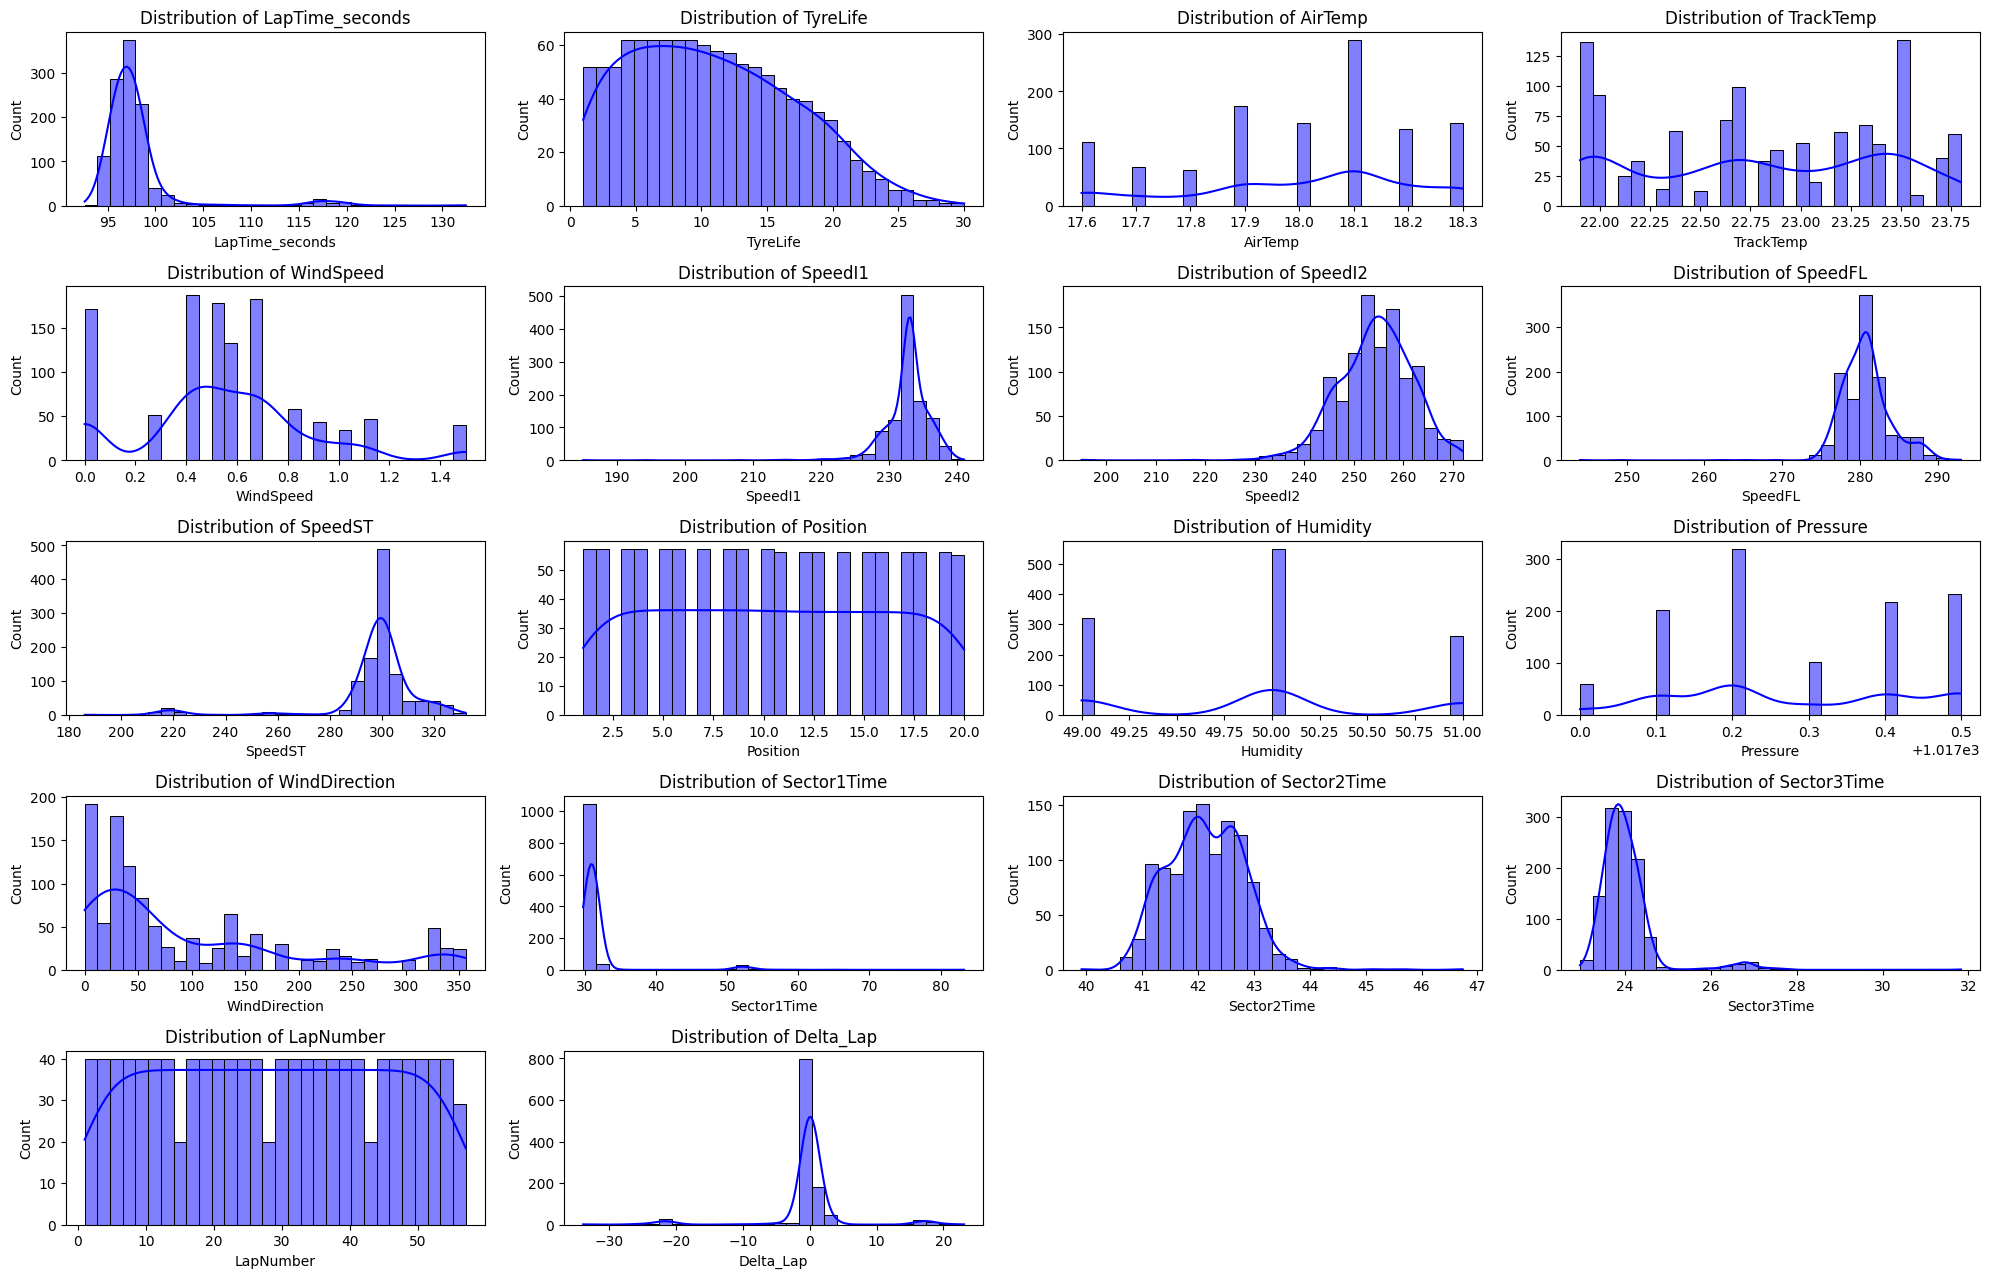

In [10]:
numerical_features = [
    'LapTime_seconds',    # Lap time in seconds
    'TyreLife',           # Tyre life
    'AirTemp',            # Air temperature
    'TrackTemp',          # Track temperature
    'WindSpeed',          # Wind speed
    'SpeedI1',            # Speed in the first sector
    'SpeedI2',            # Speed in the second sector
    'SpeedFL',            # Speed on the main straight
    'SpeedST',            # Speed in the timing sector
    'Position',           # Position in the race
    'Humidity',           # Relative humidity of the air
    'Pressure',           # Atmospheric pressure
    'WindDirection',      # Wind direction
    'Sector1Time',        # Time in sector 1
    'Sector2Time',        # Time in sector 2
    'Sector3Time',        # Time in sector 3
    'LapNumber',          # Number of the lap
    'Delta_Lap'           # time difference between two consecutives laps for each pilot
]

# Convert lap time to seconds
data['Sector1Time'] = data['Sector1Time'].dt.total_seconds()
data['Sector2Time'] = data['Sector2Time'].dt.total_seconds()
data['Sector3Time'] = data['Sector3Time'].dt.total_seconds()
# data['LapTimeSeconds'] = data['LapTime'].dt.total_seconds()

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(6, 4, i)
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}', fontsize=12)
plt.tight_layout()
plt.show()

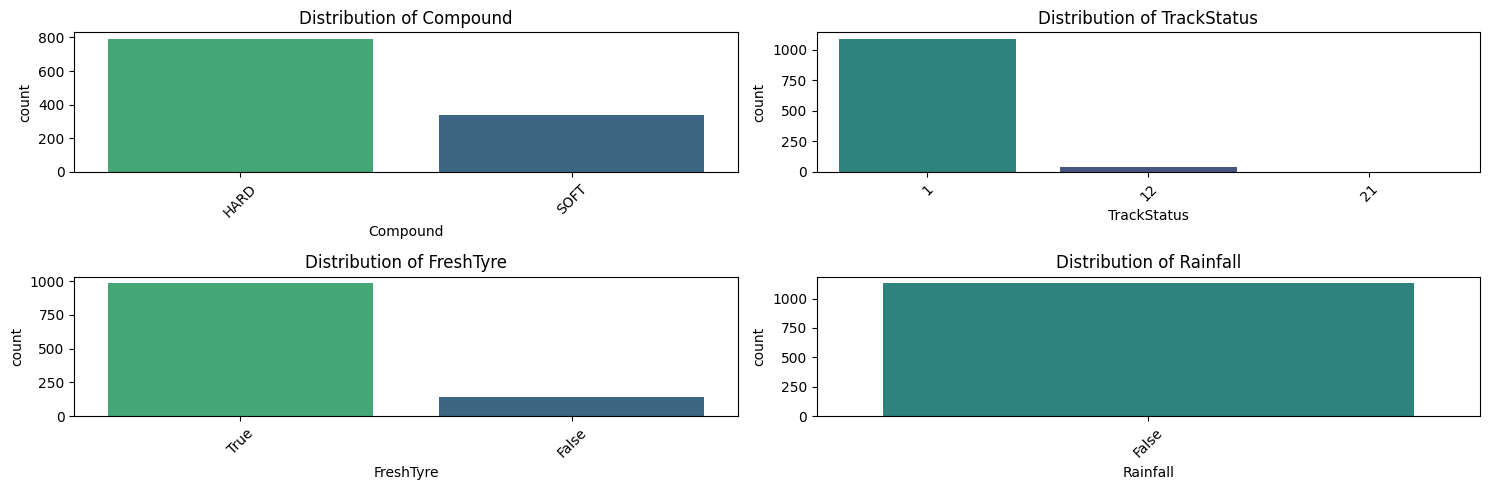

In [11]:
# Distribution of categorical variables
categorical_features = [
    'Compound',    # Tire type (SOFT, MEDIUM, HARD)
    'TrackStatus', # Track status (green flag, yellow flag, etc.)
    'FreshTyre',   # True or false
    'Rainfall'     # True or false
]

# Suppress FutureWarning from seaborn
# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    # sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette='viridis')
    sns.countplot(data=data, x=col, hue=col, order=data[col].value_counts().index, palette='viridis', legend=False)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
bahrain_2024_joined['TrackStatus'].value_counts()

TrackStatus
1     1087
12      40
21       2
Name: count, dtype: int64

### Correlation analysis

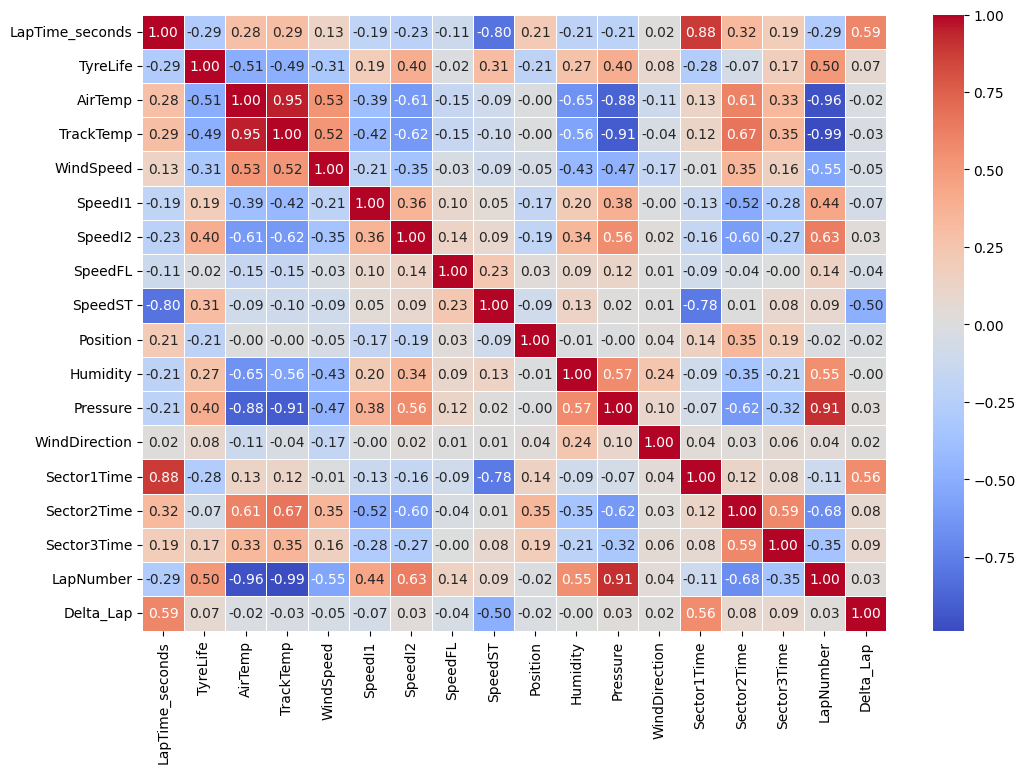

In [13]:
# Correlation matrix using Pearson's correlation coefficient
correlation_matrix = data[numerical_features].corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [14]:
# Feature selection
# Identify features most correlated with lap time (LapTimeSeconds)
correlation_with_target = correlation_matrix['LapTime_seconds'].sort_values(ascending=False)
print("Correlation of features with lap time (LapTime_seconds):")
print(correlation_with_target)

Correlation of features with lap time (LapTime_seconds):
LapTime_seconds    1.000000
Sector1Time        0.880481
Delta_Lap          0.591219
Sector2Time        0.321950
TrackTemp          0.294680
AirTemp            0.278260
Position           0.212577
Sector3Time        0.192408
WindSpeed          0.133004
WindDirection      0.018235
SpeedFL           -0.111733
SpeedI1           -0.190373
Humidity          -0.206334
Pressure          -0.213846
SpeedI2           -0.225022
LapNumber         -0.287440
TyreLife          -0.288573
SpeedST           -0.803459
Name: LapTime_seconds, dtype: float64


In [15]:
def analyze_lap_time_correlations(correlation_series):
    """
    Analyzes correlations with LapTime_seconds and categorizes them.
    """
    strong_correlations = []
    moderate_correlations = []
    weak_correlations = []

    for feature, correlation in correlation_series.items():
        abs_correlation = abs(correlation)  # Take absolute value for strength

        if abs_correlation >= 0.5:
            strong_correlations.append((feature, correlation))
        elif 0.3 <= abs_correlation < 0.5:
            moderate_correlations.append((feature, correlation))
        else:
            weak_correlations.append((feature, correlation))

    return weak_correlations, moderate_correlations, strong_correlations

def display_correlation_categories(weak, moderate, strong):
    """
    Displays the correlation categories.
    """
    print("Strong Correlations:")
    for feature, correlation in strong:
        print(f"  {feature}: {correlation:.6f}")

    print("\nModerate Correlations:")
    for feature, correlation in moderate:
        print(f"  {feature}: {correlation:.6f}")

    # print("\nWeak Correlations:")
    # for feature, correlation in weak:
    #     print(f"  {feature}: {correlation:.6f}")

correlation_series = pd.Series(correlation_with_target)

weak, moderate, strong = analyze_lap_time_correlations(correlation_series)

display_correlation_categories(weak, moderate, strong)

Strong Correlations:
  LapTime_seconds: 1.000000
  Sector1Time: 0.880481
  Delta_Lap: 0.591219
  SpeedST: -0.803459

Moderate Correlations:
  Sector2Time: 0.321950


### Others analysis

In [16]:
# # Relationship between lap time and track temperature
# plt.figure(figsize=(12, 6))
# sns.scatterplot(data=data, x='TrackTemp', y='LapTime_seconds', hue='Compound', palette='viridis', s=100)
# plt.title('Relationship between Track Temperature and Lap Time', fontsize=14)
# plt.xlabel('Track Temperature (°C)')
# plt.ylabel('Lap Time (s)')
# plt.legend(title='Tire type')
# plt.show()

In [17]:
# # Tire degradation over laps
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=data, x='LapNumber', y='LapTime_seconds', hue='Compound', style='Team', markers=True, dashes=False, palette='viridis')
# plt.title('Tire Degradation Over Laps', fontsize=14)
# plt.xlabel('Lap number')
# plt.ylabel('Lap Time (s)')
# plt.legend(title='Team')
# plt.show()

# All races

In [18]:
# Function to get the list of races for a specific year
def get_races_for_year(year):
    try:
        schedule = ff1.get_event_schedule(year)
        # Filter only official races (exclude Pre-Season Test and Track Session)
        schedule = schedule[~schedule['EventName'].str.contains("Pre-Season", case=False, na=False)]
        return schedule[['EventName', 'Location']]
    except Exception as e:
        print(f"Error fetching data for {year}: {e}")
        return pd.DataFrame()

# Get races for 2022, 2023, and 2024
years = [2022, 2023, 2024]
race_data = {}

for year in years:
    races = get_races_for_year(year)
    if not races.empty:
        race_data[year] = races.set_index('EventName')['Location'].to_dict()

# Find the races that took place in the three years
common_races = set.intersection(*[set(race_data[year].keys()) for year in years])

# DataFrame apenas com as corridas em comum e adicionar a localização
race_list = [{'EventName': race, 'Location': race_data[2024][race]} for race in sorted(common_races)]
all_races = pd.DataFrame(race_list)

# Create list of simplified race names
race_names = [name.replace(" Grand Prix", "").replace(" GP", "").split()[-1] for name in all_races['EventName']]

# print("\nRaces that took place in all three years (2022-2024):")
# print(all_races)

print(race_names)

['Dhabi', 'Australian', 'Austrian', 'Azerbaijan', 'Bahrain', 'Belgian', 'British', 'Canadian', 'Dutch', 'Hungarian', 'Italian', 'Japanese', 'City', 'Miami', 'Monaco', 'Arabian', 'Singapore', 'Spanish', 'Paulo', 'States']


In [19]:
# Function to load data for a specific year and race
def load_race_data(year, race_name):
    try:
        session = ff1.get_session(year, race_name, 'R')  # Load race session
        session.load()                                   # Load all data
        laps = session.laps                              # Get lap data
        weather = laps.get_weather_data()                # Get weather data
        laps = laps.reset_index(drop=True)
        weather = weather.reset_index(drop=True)
        weather = weather.drop(columns=['Time'])         # Drop redundant 'Time' column
        joined_data = pd.concat([laps, weather], axis=1) # Join laps and weather data
        joined_data['Event_Year'] = year                 # Add year column for reference
        joined_data['GrandPrix'] = race_name             # Add Grand Prix name column
        return joined_data
    except Exception as e:
        print(f"Error loading data for {year} {race_name}: {e}")
        return pd.DataFrame()  # Return empty DataFrame in case of error

# List of races of 2024
years = [2022, 2023, 2024]
race_names = [
    'Bahrain', 'Saudi Arabia', 'Australia', 'Azerbaijan', 'Miami', 'Monaco', 'Spain', 
    'Canada', 'Austria', 'Great Britain', 'Hungary', 'Belgium', 'Netherlands', 'Italy', 
    'Singapore', 'Japan', 'USA', 'Mexico', 'Brazil', 'Abu Dhabi'
]

# Load data for all races
all_races_data = pd.DataFrame()
for year in years:
    for race in race_names:
        print(f"Loading data for {year} {race}...")
        race_data = load_race_data(year, race)
        if not race_data.empty:
            all_races_data = pd.concat([all_races_data, race_data], ignore_index=True)

# Check the loaded data
print("\nTotal rows loaded:", len(all_races_data))
print("\nColumns in the dataset:", all_races_data.columns)

Loading data for 2022 Bahrain...
Loading data for 2022 Saudi Arabia...
Loading data for 2022 Australia...
Loading data for 2022 Azerbaijan...
Loading data for 2022 Miami...
Loading data for 2022 Monaco...
Loading data for 2022 Spain...
Loading data for 2022 Canada...
Loading data for 2022 Austria...
Loading data for 2022 Great Britain...
Loading data for 2022 Hungary...
Loading data for 2022 Belgium...
Loading data for 2022 Netherlands...
Loading data for 2022 Italy...
Loading data for 2022 Singapore...
Loading data for 2022 Japan...
Loading data for 2022 USA...
Loading data for 2022 Mexico...
Loading data for 2022 Brazil...
Loading data for 2022 Abu Dhabi...
Loading data for 2023 Bahrain...
Loading data for 2023 Saudi Arabia...
Loading data for 2023 Australia...
Loading data for 2023 Azerbaijan...
Loading data for 2023 Miami...
Loading data for 2023 Monaco...
Loading data for 2023 Spain...
Loading data for 2023 Canada...
Loading data for 2023 Austria...
Loading data for 2023 Great Bri

In [20]:
all_races_df = all_races_data.copy()

# Convert lap times to seconds
all_races_df['LapTime'] = all_races_df['LapTime'].dt.total_seconds()
all_races_df['Sector1Time'] = all_races_df['Sector1Time'].dt.total_seconds()
all_races_df['Sector2Time'] = all_races_df['Sector2Time'].dt.total_seconds()
all_races_df['Sector3Time'] = all_races_df['Sector3Time'].dt.total_seconds()
all_races_df['Sector1SessionTime'] = all_races_df['Sector1SessionTime'].dt.total_seconds()
all_races_df['Sector2SessionTime'] = all_races_df['Sector2SessionTime'].dt.total_seconds()
all_races_df['Sector3SessionTime'] = all_races_df['Sector3SessionTime'].dt.total_seconds()

In [21]:
# Calculate delta_lap (time difference between consecutive laps for each driver)
all_races_df['Delta_Lap'] = 0.0

for driver in all_races_df['Driver'].unique():
    driver_data = all_races_df[all_races_df['Driver'] == driver]
    delta_lap = driver_data['LapTime'].diff().fillna(0)
    all_races_df.loc[driver_data.index, 'Delta_Lap'] = delta_lap

all_races_df.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Event_Year,GrandPrix,Delta_Lap
0,0 days 01:04:15.340000,VER,1,100.236,1.0,1.0,NaT,NaT,NaN,42.325,24.389,NaN,3831.046,3855.427,230.0,254.0,274.0,250.0,False,SOFT,4.0,False,Red Bull Racing,0 days 01:02:34.872000,2022-03-20 15:03:34.889,1,2.0,False,,False,False,23.9,25.0,1010.2,False,29.1,20,0.5,2022,Bahrain,0.000
1,0 days 01:05:53.220000,VER,1,97.880,2.0,1.0,NaT,NaT,31.285,42.269,24.326,3886.662,3928.931,3953.257,NaN,252.0,276.0,296.0,True,SOFT,5.0,False,Red Bull Racing,0 days 01:04:15.340000,2022-03-20 15:05:15.357,1,2.0,False,,False,True,23.8,26.0,1010.4,False,29.0,357,0.5,2022,Bahrain,-2.356
2,0 days 01:07:31.577000,VER,1,98.357,3.0,1.0,NaT,NaT,31.499,42.474,24.384,3984.756,4027.230,4051.614,229.0,254.0,276.0,294.0,False,SOFT,6.0,False,Red Bull Racing,0 days 01:05:53.220000,2022-03-20 15:06:53.237,1,2.0,False,,False,True,23.8,27.0,1010.4,False,29.0,12,0.5,2022,Bahrain,0.477
3,0 days 01:09:10.143000,VER,1,98.566,4.0,1.0,NaT,NaT,31.342,42.674,24.550,4082.956,4125.630,4150.180,231.0,250.0,276.0,297.0,False,SOFT,7.0,False,Red Bull Racing,0 days 01:07:31.577000,2022-03-20 15:08:31.594,1,2.0,False,,False,True,23.8,29.0,1010.4,False,28.7,12,0.4,2022,Bahrain,0.209
4,0 days 01:10:49.020000,VER,1,98.877,5.0,1.0,NaT,NaT,31.498,42.854,24.525,4181.678,4224.532,4249.057,229.0,256.0,276.0,293.0,False,SOFT,8.0,False,Red Bull Racing,0 days 01:09:10.143000,2022-03-20 15:10:10.160,1,2.0,False,,False,True,23.8,33.0,1010.4,False,28.5,316,0.4,2022,Bahrain,0.311


### Export to CSV file

In [22]:
import os

# Define the path to the raw_data folder
raw_data_path = '/home/diego_nbotelho/code/diegonbotelho/f1-tire-prediction/raw_data'

# Define the filename
filename = 'all_races_df.csv'

# Combine the path and filename
full_path = os.path.join(raw_data_path, filename)

# Save the dataframe to CSV
all_races_data.to_csv(full_path, index=False)

print(f"Data saved to {full_path}")

Data saved to /home/diego_nbotelho/code/diegonbotelho/f1-tire-prediction/raw_data/all_races_df.csv


## Exploratory analysis with all races

In [23]:
# Missing Data Analysis
print("Missing data per column:")
print(all_races_df.isnull().sum())

Missing data per column:
Time                      0
Driver                    0
DriverNumber              0
LapTime                 968
LapNumber                 0
Stint                     0
PitOutTime            64718
PitInTime             64695
Sector1Time            1421
Sector2Time             120
Sector3Time             228
Sector1SessionTime     1581
Sector2SessionTime      120
Sector3SessionTime      228
SpeedI1               10208
SpeedI2                 117
SpeedFL                2488
SpeedST                6107
IsPersonalBest           79
Compound                  0
TyreLife                  0
FreshTyre                 0
Team                      0
LapStartTime              0
LapStartDate             79
TrackStatus               0
Position                107
Deleted                   0
DeletedReason            79
FastF1Generated           0
IsAccurate                0
AirTemp                   0
Humidity                  0
Pressure                  0
Rainfall               

In [24]:
# Handle missing data
# Fill null values in numeric columns with the median
numerical_columns = all_races_df.select_dtypes(include=[np.number]).columns
all_races_df[numerical_columns] = all_races_df[numerical_columns].fillna(all_races_df[numerical_columns].median())

# Remove columns with too many null values
all_races_df = all_races_df.dropna(axis=1, thresh=0.7 * len(data))

In [25]:
all_races_df

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Event_Year,GrandPrix,Delta_Lap
0,0 days 01:04:15.340000,VER,1,100.236,1.0,1.0,0 days 01:46:48.838000,0 days 01:45:41.055500,28.976,42.325,24.389,6597.100,3831.046,3855.427,230.0,254.0,274.0,250.0,False,SOFT,4.0,False,Red Bull Racing,0 days 01:02:34.872000,2022-03-20 15:03:34.889,1,2.0,False,,False,False,23.9,25.0,1010.2,False,29.1,20,0.5,2022,Bahrain,0.000
1,0 days 01:05:53.220000,VER,1,97.880,2.0,1.0,0 days 01:46:48.838000,0 days 01:45:41.055500,31.285,42.269,24.326,3886.662,3928.931,3953.257,277.0,252.0,276.0,296.0,True,SOFT,5.0,False,Red Bull Racing,0 days 01:04:15.340000,2022-03-20 15:05:15.357,1,2.0,False,,False,True,23.8,26.0,1010.4,False,29.0,357,0.5,2022,Bahrain,-2.356
2,0 days 01:07:31.577000,VER,1,98.357,3.0,1.0,0 days 01:46:48.838000,0 days 01:45:41.055500,31.499,42.474,24.384,3984.756,4027.230,4051.614,229.0,254.0,276.0,294.0,False,SOFT,6.0,False,Red Bull Racing,0 days 01:05:53.220000,2022-03-20 15:06:53.237,1,2.0,False,,False,True,23.8,27.0,1010.4,False,29.0,12,0.5,2022,Bahrain,0.477
3,0 days 01:09:10.143000,VER,1,98.566,4.0,1.0,0 days 01:46:48.838000,0 days 01:45:41.055500,31.342,42.674,24.550,4082.956,4125.630,4150.180,231.0,250.0,276.0,297.0,False,SOFT,7.0,False,Red Bull Racing,0 days 01:07:31.577000,2022-03-20 15:08:31.594,1,2.0,False,,False,True,23.8,29.0,1010.4,False,28.7,12,0.4,2022,Bahrain,0.209
4,0 days 01:10:49.020000,VER,1,98.877,5.0,1.0,0 days 01:46:48.838000,0 days 01:45:41.055500,31.498,42.854,24.525,4181.678,4224.532,4249.057,229.0,256.0,276.0,293.0,False,SOFT,8.0,False,Red Bull Racing,0 days 01:09:10.143000,2022-03-20 15:10:10.160,1,2.0,False,,False,True,23.8,33.0,1010.4,False,28.5,316,0.4,2022,Bahrain,0.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67068,0 days 02:18:53.038000,PIA,81,87.731,54.0,3.0,0 days 01:46:48.838000,0 days 01:45:41.055500,17.591,38.078,32.062,8262.900,8300.978,8333.040,277.0,293.0,215.0,304.0,False,HARD,22.0,True,McLaren,0 days 02:17:25.307000,2024-12-08 14:24:12.524,1,10.0,False,,False,True,25.9,60.0,1017.8,False,29.3,109,2.0,2024,Abu Dhabi,-0.437
67069,0 days 02:20:20.819000,PIA,81,87.781,55.0,3.0,0 days 01:46:48.838000,0 days 01:45:41.055500,17.639,38.014,32.128,8350.679,8388.693,8420.821,290.0,295.0,214.0,307.0,False,HARD,23.0,True,McLaren,0 days 02:18:53.038000,2024-12-08 14:25:40.255,1,10.0,False,,False,True,25.9,60.0,1017.9,False,29.3,117,3.2,2024,Abu Dhabi,0.050
67070,0 days 02:21:48.635000,PIA,81,87.816,56.0,3.0,0 days 01:46:48.838000,0 days 01:45:41.055500,17.603,38.000,32.213,8438.424,8476.424,8508.637,293.0,296.0,214.0,309.0,False,HARD,24.0,True,McLaren,0 days 02:20:20.819000,2024-12-08 14:27:08.036,1,10.0,False,,False,True,25.9,60.0,1018.0,False,29.4,110,2.1,2024,Abu Dhabi,0.035
67071,0 days 02:23:17.189000,PIA,81,88.554,57.0,3.0,0 days 01:46:48.838000,0 days 01:45:41.055500,17.650,38.546,32.358,8526.287,8564.833,8597.191,295.0,306.0,213.0,310.0,False,HARD,25.0,True,McLaren,0 days 02:21:48.635000,2024-12-08 14:28:35.852,12,10.0,False,,False,True,25.9,60.0,1018.0,False,29.4,104,2.4,2024,Abu Dhabi,0.738


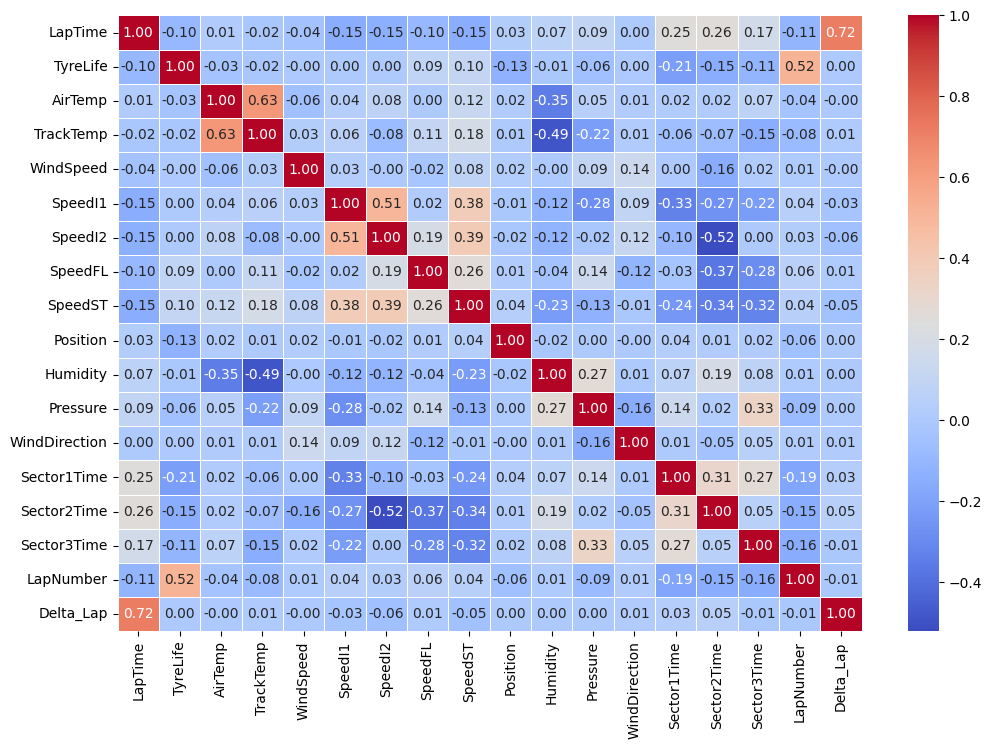

In [26]:
numerical_features = [
    'LapTime',    # Lap time in seconds
    'TyreLife',           # Tyre life
    'AirTemp',            # Air temperature
    'TrackTemp',          # Track temperature
    'WindSpeed',          # Wind speed
    'SpeedI1',            # Speed in the first sector
    'SpeedI2',            # Speed in the second sector
    'SpeedFL',            # Speed on the main straight
    'SpeedST',            # Speed in the timing sector
    'Position',           # Position in the race
    'Humidity',           # Relative humidity of the air
    'Pressure',           # Atmospheric pressure
    'WindDirection',      # Wind direction
    'Sector1Time',        # Time in sector 1
    'Sector2Time',        # Time in sector 2
    'Sector3Time',        # Time in sector 3
    'LapNumber',          # Number of the lap
    'Delta_Lap'           # time difference between two consecutives laps for each pilot
]

# Correlation matrix using Pearson's correlation coefficient
correlation_matrix = all_races_df[numerical_features].corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [27]:
def analyze_lap_time_correlations(correlation_series):
    """
    Analyzes correlations with LapTime_seconds and categorizes them.
    """

    strong_correlations = []
    moderate_correlations = []
    weak_correlations = []

    for feature, correlation in correlation_series.items():
        abs_correlation = abs(correlation)  # Take absolute value for strength

        if abs_correlation >= 0.5:
            strong_correlations.append((feature, correlation))
        elif 0.3 <= abs_correlation < 0.5:
            moderate_correlations.append((feature, correlation))
        else:
            weak_correlations.append((feature, correlation))

    return weak_correlations, moderate_correlations, strong_correlations

def display_correlation_categories(weak, moderate, strong):
    """
    Displays the correlation categories.
    """

    print("Strong Correlations:")
    for feature, correlation in strong:
        print(f"  {feature}: {correlation:.6f}")

    print("\nModerate Correlations:")
    for feature, correlation in moderate:
        print(f"  {feature}: {correlation:.6f}")

    # print("\nWeak Correlations:")
    # for feature, correlation in weak:
    #     print(f"  {feature}: {correlation:.6f}")

correlation_series = pd.Series(correlation_with_target)

weak, moderate, strong = analyze_lap_time_correlations(correlation_series)

display_correlation_categories(weak, moderate, strong)

Strong Correlations:
  LapTime_seconds: 1.000000
  Sector1Time: 0.880481
  Delta_Lap: 0.591219
  SpeedST: -0.803459

Moderate Correlations:
  Sector2Time: 0.321950
